In [5]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=57108c3f535c2fbfc6fbf5fb7b4a803c7db1902d5add85803b4b33a6aa37bc93
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


Irrigation amount: 64.13


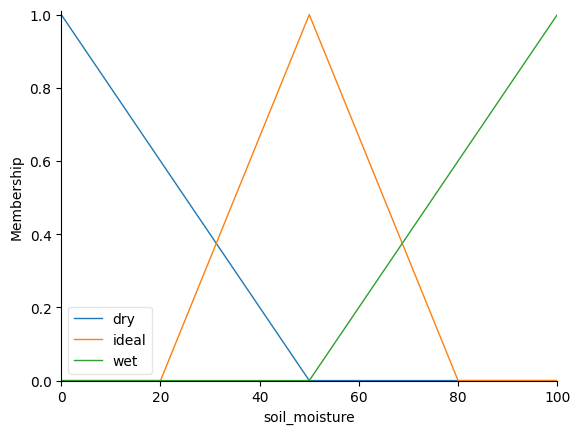

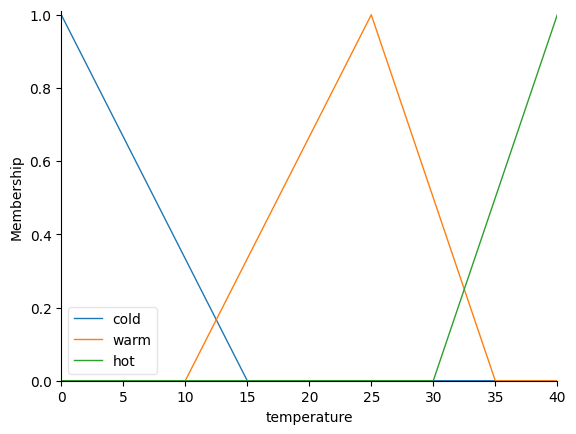

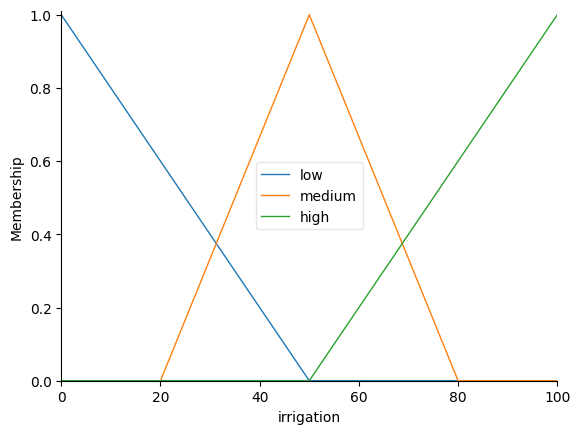

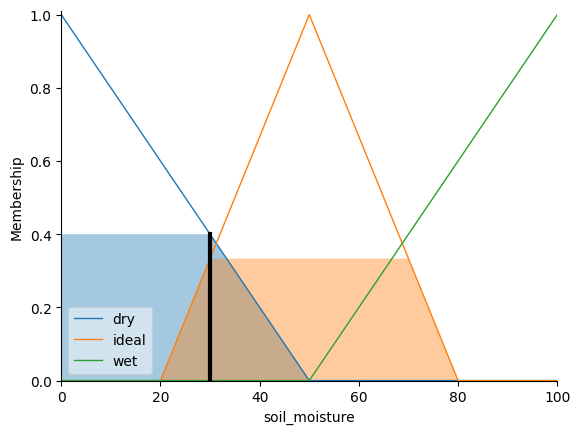

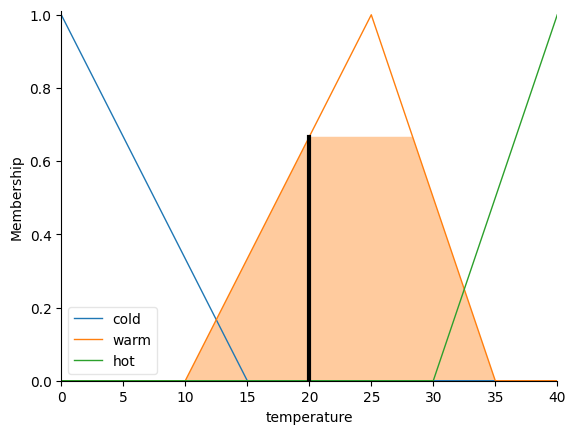

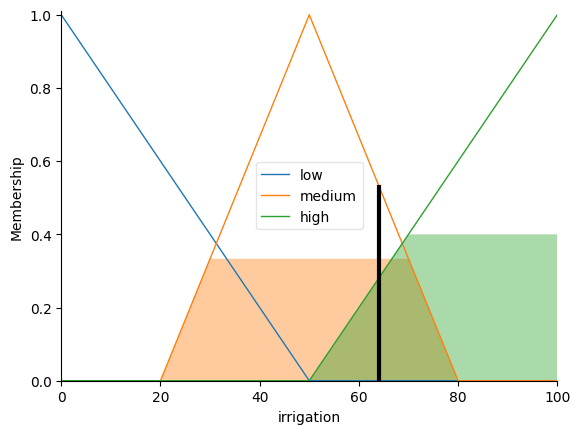

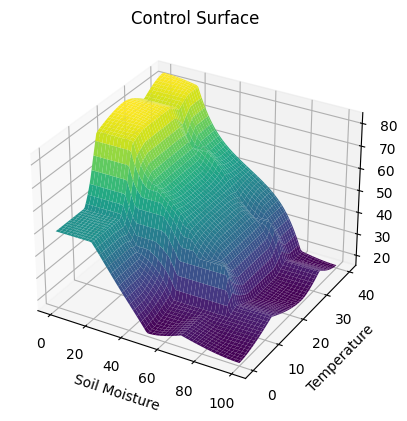

In [6]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define the universe of discourse (range) for inputs and outputs
soil_moisture = ctrl.Antecedent(np.arange(0, 101, 1), 'soil_moisture')
temperature = ctrl.Antecedent(np.arange(0, 41, 1), 'temperature')
irrigation = ctrl.Consequent(np.arange(0, 101, 1), 'irrigation')

# Define fuzzy sets and membership functions for soil moisture
soil_moisture['dry'] = fuzz.trimf(soil_moisture.universe, [0, 0, 50])
soil_moisture['ideal'] = fuzz.trimf(soil_moisture.universe, [20, 50, 80])
soil_moisture['wet'] = fuzz.trimf(soil_moisture.universe, [50, 100, 100])

# Define fuzzy sets and membership functions for temperature
temperature['cold'] = fuzz.trimf(temperature.universe, [0, 0, 15])
temperature['warm'] = fuzz.trimf(temperature.universe, [10, 25, 35])
temperature['hot'] = fuzz.trimf(temperature.universe, [30, 40, 40])

# Define fuzzy sets and membership functions for irrigation
irrigation['low'] = fuzz.trimf(irrigation.universe, [0, 0, 50])
irrigation['medium'] = fuzz.trimf(irrigation.universe, [20, 50, 80])
irrigation['high'] = fuzz.trimf(irrigation.universe, [50, 100, 100])

# Visualize these universes and membership functions
soil_moisture.view()
temperature.view()
irrigation.view()

# Define the rules
rule1 = ctrl.Rule(soil_moisture['dry'] & temperature['cold'], irrigation['medium'])
rule2 = ctrl.Rule(soil_moisture['dry'] & temperature['warm'], irrigation['high'])
rule3 = ctrl.Rule(soil_moisture['dry'] & temperature['hot'], irrigation['high'])

rule4 = ctrl.Rule(soil_moisture['ideal'] & temperature['cold'], irrigation['low'])
rule5 = ctrl.Rule(soil_moisture['ideal'] & temperature['warm'], irrigation['medium'])
rule6 = ctrl.Rule(soil_moisture['ideal'] & temperature['hot'], irrigation['medium'])

rule7 = ctrl.Rule(soil_moisture['wet'] & temperature['cold'], irrigation['low'])
rule8 = ctrl.Rule(soil_moisture['wet'] & temperature['warm'], irrigation['low'])
rule9 = ctrl.Rule(soil_moisture['wet'] & temperature['hot'], irrigation['low'])

# Create the control system and simulation
irrigation_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
irrigation_sim = ctrl.ControlSystemSimulation(irrigation_ctrl)

# Function to compute irrigation amount
def irrigate(soil_moisture_value, temperature_value):
    irrigation_sim.input['soil_moisture'] = soil_moisture_value
    irrigation_sim.input['temperature'] = temperature_value

    # Perform the computation
    irrigation_sim.compute()

    return irrigation_sim.output['irrigation']

# Example usage
soil_moisture_value = 30  # Example soil moisture value
temperature_value = 20  # Example temperature value

irrigation_amount = irrigate(soil_moisture_value, temperature_value)
print(f'Irrigation amount: {irrigation_amount:.2f}')

# Visualize the results
soil_moisture.view(sim=irrigation_sim)
temperature.view(sim=irrigation_sim)
irrigation.view(sim=irrigation_sim)

# Plot the control surface
# Generate uniformly sampled input space
soil_moisture_range = np.linspace(0, 100, 100)
temperature_range = np.linspace(0, 40, 100)
soil_moisture_grid, temperature_grid = np.meshgrid(soil_moisture_range, temperature_range)

# Compute output space
irrigation_grid = np.zeros_like(soil_moisture_grid)
for i in range(100):
    for j in range(100):
        irrigation_sim.input['soil_moisture'] = soil_moisture_grid[i, j]
        irrigation_sim.input['temperature'] = temperature_grid[i, j]
        irrigation_sim.compute()
        irrigation_grid[i, j] = irrigation_sim.output['irrigation']

# Plot the control surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(soil_moisture_grid, temperature_grid, irrigation_grid, cmap='viridis')

ax.set_xlabel('Soil Moisture')
ax.set_ylabel('Temperature')
ax.set_zlabel('Irrigation')
plt.title('Control Surface')
plt.show()
